In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
NIO_2yrs = pd.read_csv("NIO_STOCK_DATA_10yrs.csv", index_col=0)

In [ ]:
NIO_2yrs["Date"] = NIO_2yrs["timestamp"]

In [7]:
NIO_2yrs.head()

,Close,Open,Low,High,Volume
timestamp,,,,,
2018-09-12,6.60,6.00,5.35,6.93,66849000
2018-09-13,11.60,6.62,6.52,12.69,158346500
2018-09-14,9.90,12.66,9.22,13.80,172473600
2018-09-17,8.50,9.61,8.50,9.75,56323900
2018-09-18,7.68,8.73,7.67,9.10,41827600


In [3]:
NIO_2yrs['timestamp']=pd.to_datetime(NIO_2yrs['timestamp'])

In [6]:
# we make the timestamp the index so as to use timestamp slicing below
# run this code box just once, other times would return a KeyError
NIO_2yrs = NIO_2yrs.set_index("timestamp")

In [5]:
NIO_2yrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  600 non-null    datetime64[ns]
 1   Close      600 non-null    float64       
 2   Open       600 non-null    float64       
 3   Low        600 non-null    float64       
 4   High       600 non-null    float64       
 5   Volume     600 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 32.8 KB


In [8]:
NIO_2yrs.describe(include= 'all')

,Close,Open,Low,High,Volume,Date
count,598.000000,598.000000,598.000000,598.000000,5.980000e+02,598
unique,NaN,NaN,NaN,NaN,NaN,598
top,NaN,NaN,NaN,NaN,NaN,2020-08-26 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,1
first,NaN,NaN,NaN,NaN,NaN,2018-09-12 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2021-01-27 00:00:00
mean,10.892149,10.869130,10.419281,11.291371,6.717410e+07,NaN
std,13.988525,13.956644,13.364406,14.468684,7.790910e+07,NaN
min,1.320000,1.190000,1.190000,1.450000,5.111000e+06,NaN
25%,3.182500,3.142500,3.055000,3.270000,1.996672e+07,NaN


In [6]:
NIO_2yrs.isnull().sum()

Close     0
Open      0
Low       0
High      0
Volume    0
dtype: int64

In [7]:
NIO_2yrs

,Close,Open,Low,High,Volume,Date
timestamp,,,,,,
2018-09-12,6.600000,6.000000,5.350000,6.930000,66849000,2018-09-12
2018-09-13,11.600000,6.620000,6.520000,12.690000,158346500,2018-09-13
2018-09-14,9.900000,12.660000,9.220000,13.800000,172473600,2018-09-14
2018-09-17,8.500000,9.610000,8.500000,9.750000,56323900,2018-09-17
2018-09-18,7.680000,8.730000,7.670000,9.100000,41827600,2018-09-18
...,...,...,...,...,...,...
2021-01-21,58.340000,57.020000,55.880001,58.580002,73119500,2021-01-21
2021-01-22,61.950001,58.950001,58.320000,62.169998,133918100,2021-01-22
2021-01-25,59.990002,64.050003,58.349998,64.519997,111986400,2021-01-25


This code Below is called timestamp slicing, it is very similar to pyhton index slicing but this time We are dataframe index slicing

# example 1

In [8]:
# This slices from the beginnning of 2019 to the end
# as you can see  with the head and tail functions
NIO_2019 = NIO_2yrs["2019":"2019"]
NIO_2019.head()

,Close,Open,Low,High,Volume
timestamp,,,,,
2019-01-02,6.20,6.13,6.00,6.24,8823600
2019-01-03,6.05,6.10,6.02,6.15,7562900
2019-01-04,6.36,6.19,6.13,6.40,9405600
2019-01-07,6.50,6.41,6.31,6.59,9709000
2019-01-08,6.40,6.57,6.17,6.58,9603800


In [9]:
NIO_2019.tail()

,Close,Open,Low,High,Volume
timestamp,,,,,
2019-12-24,2.53,2.63,2.45,2.63,32029800
2019-12-26,2.51,2.45,2.35,2.52,44173700
2019-12-27,2.42,2.54,2.41,2.55,37553300
2019-12-30,3.72,2.92,2.88,4.87,432720700
2019-12-31,4.02,4.15,3.82,4.42,215008600


# example 2

In [11]:
# This slices from the whole of January 2019
NIO_2019_jan = NIO_2yrs["2019-1-1":"2019-1-7"]
NIO_2019_jan.head

<bound method NDFrame.head of             Close  Open   Low  High   Volume
timestamp                                   
2019-01-02   6.20  6.13  6.00  6.24  8823600
2019-01-03   6.05  6.10  6.02  6.15  7562900
2019-01-04   6.36  6.19  6.13  6.40  9405600
2019-01-07   6.50  6.41  6.31  6.59  9709000>

In [11]:
# NIO_2019_jan.teail

In [13]:
NIO_2yrs["2018-9":"2018-9"]["High"]

,Close,Open,Low,High,Volume
timestamp,,,,,
2018-09-12,6.60,6.00,5.35,6.93,66849000
2018-09-13,11.60,6.62,6.52,12.69,158346500
2018-09-14,9.90,12.66,9.22,13.80,172473600
2018-09-17,8.50,9.61,8.50,9.75,56323900
2018-09-18,7.68,8.73,7.67,9.10,41827600
2018-09-19,8.50,7.88,7.54,9.15,48306500
2018-09-20,8.78,9.07,8.42,9.47,40275000
2018-09-21,8.59,9.05,8.50,9.07,15118500
2018-09-24,7.87,8.32,7.85,8.39,16297900


In [78]:
a = NIO_2yrs["2020-1":"2019-1"]

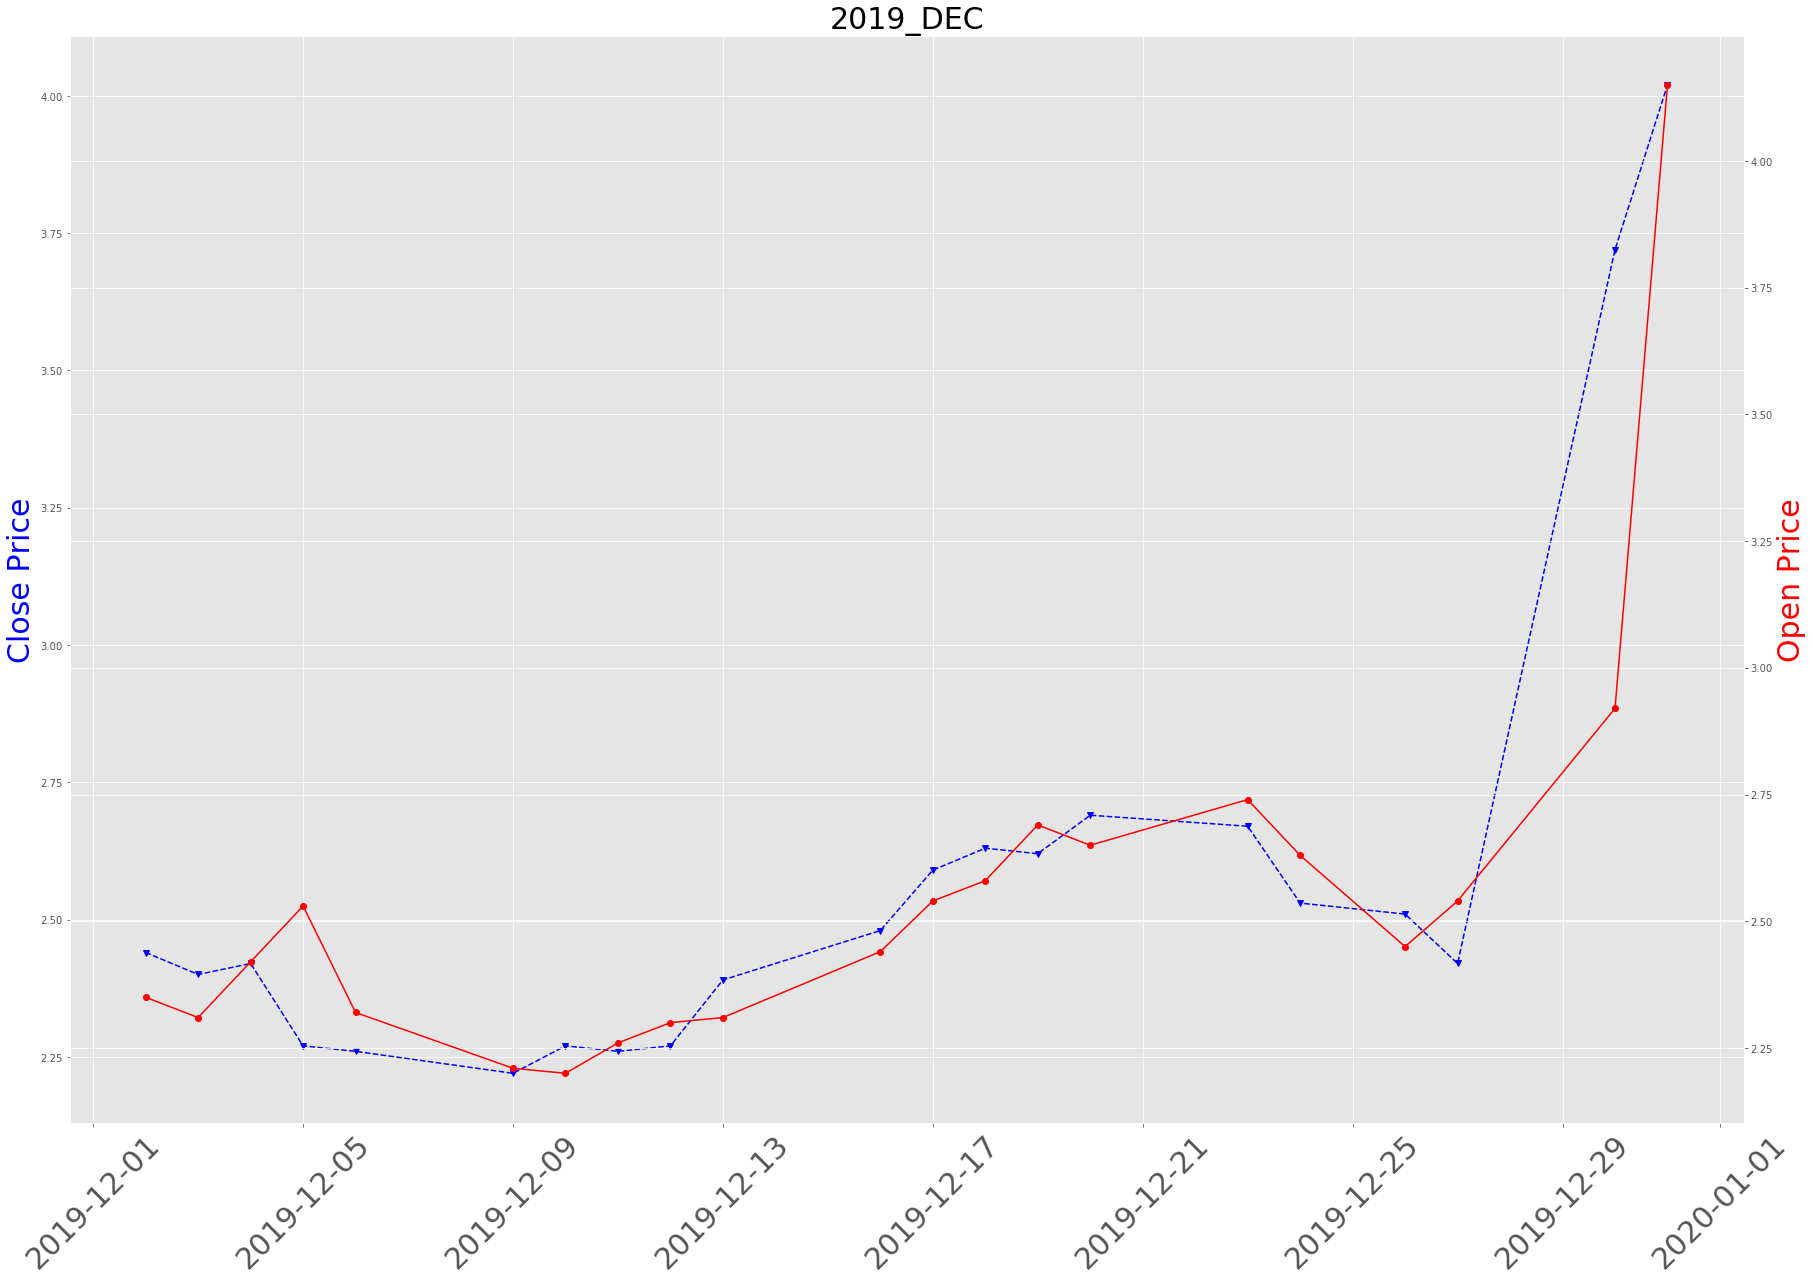

In [79]:
# plotting a graph of whole of January 2019's Open and Close price in the same graph
# this matplotlib code syntax isnt common, pls use another code syntax if youre not comfortable with this one
# you can contact khaleed if you have any questions regarding this
plt.style.use("ggplot")
fig, ax = plt.subplots()
fig.set_size_inches([30, 20])
ax.plot(a.index, a["Close"], color='blue', marker="v", linestyle="--")
# ax.set_xlabel("Date", fontsize=30)
ax.set_ylabel("Close Price", color='blue', fontsize=30)
ax.set_xticklabels(a.index, rotation=45, fontsize=30)
ax.set_title("2020_JAN", fontsize=30)

ax2 = ax.twinx()
ax2.plot(a.index, a["Open"], color='red', marker="o")
ax2.set_ylabel("Open Price", color='red', fontsize=30)
# save the picture on your local machine to visualize properly
fig.savefig("JAN_2020_CO.png", dpi=300)

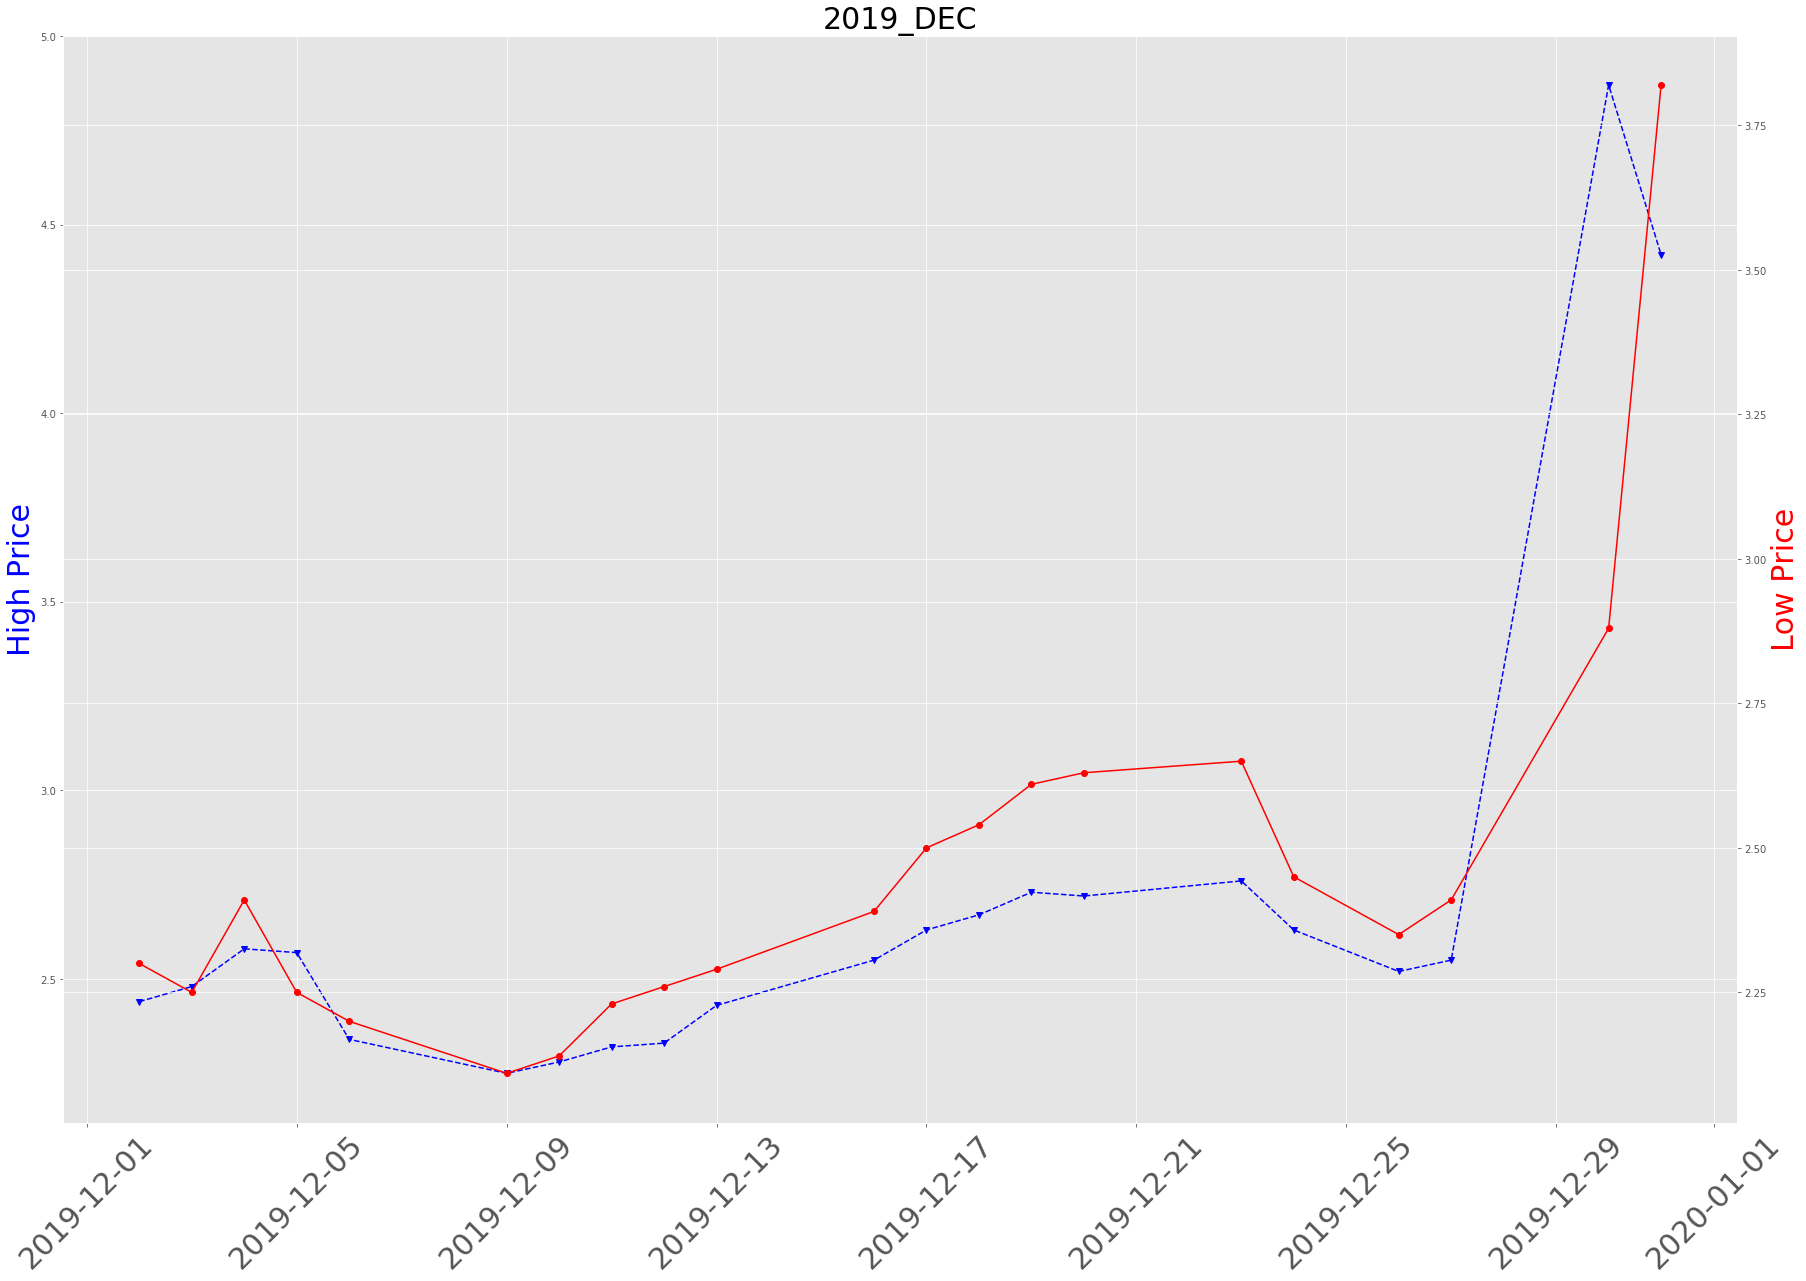

In [80]:
# plotting a graph of whole of January 2019's Open and Close price in the same graph
# this matplotlib code syntax isnt common, pls use another code syntax if youre not comfortable with this one
# you can contact khaleed if you have any questions regarding this
plt.style.use("ggplot")
fig, ax = plt.subplots()
fig.set_size_inches([30, 20])
ax.plot(a.index, a["High"], color='blue', marker="v", linestyle="--")
# ax.set_xlabel("Date", fontsize=30)
ax.set_ylabel("High Price", color='blue', fontsize=30)
ax.set_xticklabels(a.index, rotation=45, fontsize=30)
ax.set_title("2020_JAN", fontsize=30)

ax2 = ax.twinx()
ax2.plot(a.index, a["Low"], color='red', marker="o")
ax2.set_ylabel("Low Price", color='red', fontsize=30)
# save the picture on your local machine to visualize properly
fig.savefig("JAN_2020_HL.png", dpi=300)